# **Init**

In [ ]:
!unzip dataset.zip

Installing Necessary Packages

In [ ]:
!pip install pandas
!pip install hazm
!pip install nltk
!pip install scikit-learn matplotlib
!pip install datasets

# **Data**

In [2]:
import pandas as pd

file_path = './dataset.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Content_1', 'Content_2'])
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85


In [3]:
column_names = df.columns.tolist()

print(column_names)

['Link', 'EN_title', 'PENGLISH_title', 'PERSIAN_title', 'Content_1', 'Content_2', 'Score', 'Year', 'Genre', 'Time']


accoring to the dataset explanations Content_1 contains the persian storyline of the movie and Content_2 contains the english storyline of the movie

In [4]:
unique_genres = set()

for genres in df['Genre']:
    for genre in genres.split(','):
        unique_genres.add(genre.strip())

unique_genres_list = list(unique_genres)

unique_genres_list.sort()

print(unique_genres_list)

print(f'number of genres: '+str(len(unique_genres_list)))

['Action', 'Adventure', 'Animation', 'Arts & Literature', 'Comedy', 'Crime', 'Drama', 'Experimental', 'Family', 'History', 'Horror', 'Human Interest & Society', 'Mystery', 'Portrait', 'Romance', 'Thriller', 'War']
number of genres: 17


In [5]:
genre_counts = df['Genre'].value_counts()

print(genre_counts)

Genre
Drama                       540
Comedy                      177
Action                       57
Crime                        46
Adventure                    37
Family                       18
War                          16
Human Interest & Society      8
Horror                        7
History                       7
Romance                       6
Mystery                       4
Arts & Literature             3
Thriller                      2
Experimental                  2
Animation                     1
Portrait                      1
Name: count, dtype: int64


In [6]:
genre_mapping = {
    'Drama': 'Drama & Emotion',
    'Romance': 'Drama & Emotion',
    'Mystery': 'Drama & Emotion',
    'Portrait': 'Drama & Emotion',
    'Comedy': 'Comedy & Light-Hearted',
    'Family': 'Comedy & Light-Hearted',
    'Animation': 'Comedy & Light-Hearted',
    'Action': 'Action & Adventure',
    'Crime': 'Action & Adventure',
    'Adventure': 'Action & Adventure',
    'Thriller': 'Action & Adventure',
    'War': 'Action & Adventure',
    'Horror': 'Action & Adventure',
    'Human Interest & Society': 'Culture & Society',
    'Culture & Traditions': 'Culture & Society',
    'History': 'Culture & Society',
    'Architecture & Urbanism': 'Culture & Society',
    'Arts & Literature': 'Arts & Nature',
    'Music': 'Arts & Nature',
    'Nature & Wildlife': 'Arts & Nature',
    'Experimental': 'Arts & Nature'
}

df['Broad_Genre'] = df['Genre'].map(genre_mapping)

In [7]:
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time,Broad_Genre
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73,Drama & Emotion
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78,Action & Adventure
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77,Drama & Emotion
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79,Drama & Emotion
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85,Drama & Emotion


In [8]:
genre_counts = df['Broad_Genre'].value_counts()

print(genre_counts)

Broad_Genre
Drama & Emotion           551
Comedy & Light-Hearted    196
Action & Adventure        165
Culture & Society          15
Arts & Nature               5
Name: count, dtype: int64


# **Preprocesses**

Normalization for persian

In [9]:
persian_stop_words = ['و', 'در', 'به', 'از', 'كه', 'مي', 'اين', 'است', 'را', 'با', 'هاي', 'براي', 'آن', 'يك', 'شود', 'شده', 'خود', 'ها', 'كرد', 'شد', 'اي', 'تا', 'كند', 'بر', 'بود', 'گفت', 'نيز', 'وي', 'هم', 'كنند', 'دارد', 'ما', 'كرده', 'يا', 'اما', 'بايد', 'دو', 'اند', 'هر', 'خواهد', 'او', 'مورد', 'آنها', 'باشد', 'ديگر', 'مردم', 'نمي', 'بين', 'پيش', 'پس', 'اگر', 'همه', 'صورت', 'يكي', 'هستند', 'بي', 'من', 'دهد', 'هزار', 'نيست', 'استفاده', 'داد', 'داشته', 'راه', 'داشت', 'چه', 'همچنين', 'كردند', 'داده', 'بوده', 'دارند', 'همين', 'ميليون', 'سوي', 'شوند', 'بيشتر', 'بسيار', 'روي', 'گرفته', 'هايي', 'تواند', 'اول', 'نام', 'هيچ', 'چند', 'جديد', 'بيش', 'شدن', 'كردن', 'كنيم', 'نشان', 'حتي', 'اينكه', 'ولی', 'توسط', 'چنين', 'برخي', 'نه', 'ديروز', 'دوم', 'درباره', 'بعد', 'مختلف', 'گيرد', 'شما', 'گفته', 'آنان', 'بار', 'طور', 'گرفت', 'دهند', 'گذاري', 'بسياري', 'طي', 'بودند', 'ميليارد', 'بدون', 'تمام', 'كل', 'تر  براساس', 'شدند', 'ترين', 'امروز', 'باشند', 'ندارد', 'چون', 'قابل', 'گويد', 'ديگري', 'همان', 'خواهند', 'قبل', 'آمده', 'اكنون', 'تحت', 'طريق', 'گيري', 'جاي', 'هنوز', 'چرا', 'البته', 'كنيد', 'سازي', 'سوم', 'كنم', 'بلكه', 'زير', 'توانند', 'ضمن', 'فقط', 'بودن', 'حق', 'آيد', 'وقتي', 'اش', 'يابد', 'نخستين', 'مقابل', 'خدمات', 'امسال', 'تاكنون', 'مانند', 'تازه', 'آورد', 'فكر', 'آنچه', 'نخست', 'نشده', 'شايد', 'چهار', 'جريان', 'پنج', 'ساخته', 'زيرا', 'نزديك', 'برداري', 'كسي', 'ريزي', 'رفت', 'گردد', 'مثل', 'آمد', 'ام', 'بهترين', 'دانست', 'كمتر', 'دادن', 'تمامي', 'جلوگيري', 'بيشتري', 'ايم', 'ناشي', 'چيزي', 'آنكه', 'بالا', 'بنابراين', 'ايشان', 'بعضي', 'دادند', 'داشتند', 'برخوردار', 'نخواهد', 'هنگام', 'نبايد', 'غير', 'نبود', 'ديده', 'وگو', 'داريم', 'چگونه', 'بندي', 'خواست', 'فوق', 'ده', 'نوعي', 'هستيم', 'ديگران', 'همچنان', 'سراسر', 'ندارند', 'گروهي', 'سعي', 'روزهاي', 'آنجا', 'يكديگر', 'كردم', 'بيست', 'بروز', 'سپس', 'رفته', 'آورده', 'نمايد', 'باشيم', 'گويند', 'زياد', 'خويش', 'همواره', 'گذاشته', 'شش  نداشته', 'شناسي', 'خواهيم', 'آباد', 'داشتن', 'نظير', 'همچون', 'باره', 'نكرده', 'شان', 'سابق', 'هفت', 'دانند', 'جايي', 'بی', 'جز', 'زیرِ', 'رویِ', 'سریِ', 'تویِ', 'جلویِ', 'پیشِ', 'عقبِ', 'بالایِ', 'خارجِ', 'وسطِ', 'بیرونِ', 'سویِ', 'کنارِ', 'پاعینِ', 'نزدِ', 'نزدیکِ', 'دنبالِ', 'حدودِ', 'برابرِ', 'طبقِ', 'مانندِ', 'ضدِّ', 'هنگامِ', 'برایِ', 'مثلِ', 'بارة', 'اثرِ', 'تولِ', 'علّتِ', 'سمتِ', 'عنوانِ', 'قصدِ', 'روب', 'جدا', 'کی', 'که', 'چیست', 'هست', 'کجا', 'کجاست', 'کَی', 'چطور', 'کدام', 'آیا', 'مگر', 'چندین', 'یک', 'چیزی', 'دیگر', 'کسی', 'بعری', 'هیچ', 'چیز', 'جا', 'کس', 'هرگز', 'یا', 'تنها', 'بلکه', 'خیاه', 'بله', 'بلی', 'آره', 'آری', 'مرسی', 'البتّه', 'لطفاً', 'ّه', 'انکه', 'وقتیکه', 'همین', 'پیش', 'مدّتی', 'هنگامی', 'مان', 'تان']

In [10]:
def remove_stopwords_persian(text):
    return ' '.join([word for word in text.split() if word not in persian_stop_words])

In [11]:
import re
import unicodedata

def normalize_unicode(text):
    return unicodedata.normalize('NFC', text)

def normalize_arabic_persian_characters(text):
    arabic_to_persian = {
        'ك': 'ک',
        'ي': 'ی',
        'ى': 'ی',
        'ة': 'ه',
        'ؤ': 'و',
        'إ': 'ا',
        'أ': 'ا',
        'ٱ': 'ا',
    }
    for arabic_char, persian_char in arabic_to_persian.items():
        text = text.replace(arabic_char, persian_char)
    return text

def normalize_digits(text):
    arabic_digits = '۰۱۲۳۴۵۶۷۸۹'
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    digit_mapping = str.maketrans(arabic_digits + persian_digits, english_digits * 2)
    return text.translate(digit_mapping)

def strip_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def initial_normalization_persian(text,
                           normalize_unicode_flag=True,
                           normalize_arabic_persian_characters_flag=True,
                           normalize_digits_flag=True,
                           strip_extra_whitespace_flag=True):
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if normalize_arabic_persian_characters_flag:
        text = normalize_arabic_persian_characters(text)
    if normalize_digits_flag:
        text = normalize_digits(text)
    if strip_extra_whitespace_flag:
        text = strip_extra_whitespace(text)
    return text

example_text = "كتاب‌هاي خوبی هستند! ۱۲۳"
normalized_text = initial_normalization_persian(example_text,
                                         normalize_unicode_flag=True,
                                         normalize_arabic_persian_characters_flag=True,
                                         normalize_digits_flag=True,
                                         strip_extra_whitespace_flag=True)
print(normalized_text)  # Output: "کتابهای خوبی هستند 123"



کتاب‌های خوبی هستند! 123


In [12]:
from hazm import Stemmer, Lemmatizer

def final_normalization_persian(text,
                           stem_flag=False,
                           lemmatize_flag=False,
                           handle_suffixes_and_prefixes_flag=False):
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()

    if stem_flag:
        text = ' '.join(stemmer.stem(word) for word in text.split())

    if lemmatize_flag:
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    if handle_suffixes_and_prefixes_flag:
        pass

    return text

example_text = "کتاب‌ها گذشته‌اند و من می‌خواهم خواندنش را"
normalized_text = final_normalization_persian(example_text,
                                          stem_flag=True,
                                          lemmatize_flag=True,
                                          handle_suffixes_and_prefixes_flag=False)
print(normalized_text)

کتاب گذشت#گذر و من می‌خواه خواندن را


normalize for English

In [13]:
import re
import string
import unicodedata
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

def normalize_unicode(text):
    return unicodedata.normalize('NFKC', text)

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

def initial_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False):
    if normalize_unicode_flag:
        text = normalize_unicode(text)
    if to_lowercase_flag:
        text = to_lowercase(text)
    if remove_punctuation_flag:
        text = remove_punctuation(text)
    if remove_digits_flag:
        text = remove_digits(text)
    if remove_extra_whitespace_flag:
        text = remove_extra_whitespace(text)
    if remove_stopwords_flag:
        text = remove_stopwords(text)
    return text

example_text = "This is an Example! Text, with some punctuation. And numbers 12345."
normalized_text = initial_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True)
print(normalized_text)  # Output: "example text punctuation numbers"

example text punctuation numbers


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_accented_characters(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def final_normalization_english(text,
                           normalize_unicode_flag=True,
                           to_lowercase_flag=True,
                           remove_punctuation_flag=True,
                           remove_digits_flag=True,
                           remove_extra_whitespace_flag=True,
                           remove_stopwords_flag=False,
                           remove_urls_flag=False,
                           remove_html_tags_flag=False,
                           remove_special_characters_flag=False,
                           remove_accented_characters_flag=False,
                           stem_flag=False,
                           lemmatize_flag=False):
    if remove_urls_flag:
        text = remove_urls(text)
    if remove_html_tags_flag:
        text = remove_html_tags(text)
    if remove_special_characters_flag:
        text = remove_special_characters(text)
    if remove_accented_characters_flag:
        text = remove_accented_characters(text)
    if normalize_unicode_flag:
        text = unicodedata.normalize('NFKC', text)
    if to_lowercase_flag:
        text = text.lower()
    if remove_punctuation_flag:
        text = text.translate(str.maketrans('', '', string.punctuation))
    if remove_digits_flag:
        text = re.sub(r'\d+', '', text)
    if remove_extra_whitespace_flag:
        text = re.sub(r'\s+', ' ', text).strip()
    if remove_stopwords_flag:
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])
    if stem_flag:
        stemmer = PorterStemmer()
        text = ' '.join(stemmer.stem(word) for word in text.split())
    if lemmatize_flag:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

example_text = "This is an Example! Text, with some punctuation. And numbers 12345. Visit https://example.com"
normalized_text = final_normalization_english(example_text,
                                         normalize_unicode_flag=True,
                                         to_lowercase_flag=True,
                                         remove_punctuation_flag=True,
                                         remove_digits_flag=True,
                                         remove_extra_whitespace_flag=True,
                                         remove_stopwords_flag=True,
                                         remove_urls_flag=True,
                                         remove_html_tags_flag=True,
                                         remove_special_characters_flag=True,
                                         remove_accented_characters_flag=True,
                                         stem_flag=True,
                                         lemmatize_flag=True)
print(normalized_text)  # Output: "exampl text punctuation number visit"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


exampl text punctuat number visit


# **Split**

In [15]:
import pandas as pd

def create_filtered_datasets(df):

    persian_df = df.drop(columns=['Content_2']).rename(columns={'Content_1': 'Description'})

    english_df = df.drop(columns=['Content_1']).rename(columns={'Content_2': 'Description'})

    return persian_df, english_df

persian_df, english_df = create_filtered_datasets(df)

print("Persian Descriptions Dataset:")
print(persian_df.head())

print("English Descriptions Dataset:")
print(english_df.head())

Persian Descriptions Dataset:
                                                Link            EN_title  \
0  https://www.imvbox.com/watch-persian-movie-ira...   Local Anaesthetic   
1  https://www.imvbox.com/watch-persian-movie-ira...         Disturbance   
2  https://www.imvbox.com/watch-persian-movie-ira...           Highlight   
3  https://www.imvbox.com/watch-persian-movie-ira...               Gilda   
4  https://www.imvbox.com/watch-persian-movie-ira...  Atmosphere Station   

     PENGLISH_title   PERSIAN_title  \
0  Bi Hessie Mozeie    بی‌حسی موضعی   
1         Ashoftegi        آشفته گی   
2           Haylayt         هایلایت   
3            Geelda           گیلدا   
4  Istgahe Atmosfer  ایستگاه اتمسفر   

                                         Description  Score  Year  Genre Time  \
0  جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...    4.8  2018  Drama   73   
1  «آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...    3.8  2018  Crime   78   
2  یک تصادف اتومبیل آدم‌هایی را در 

Split Datasets

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold


def split_80_10_10(df):
    train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

    return train_df, val_df, test_df



persian_train_df_80, persian_val_df_10, persian_test_df_10 = split_80_10_10(persian_df)

english_train_df_80, english_val_df_10, english_test_df_10 = split_80_10_10(english_df)

you can access folds of cross validation using these four variables  <br></br>
persian_train_folds_90_10 <br></br>
persian_test_folds_90_10  <br></br>
english_folds_90_10 <br></br>
english_test_folds_90_10

# **Metrics**

Functions to calculate all necessary metrics for multiclass classification and aggregating metrics in cross validation

F1 Macro: 0.26666666666666666
F1 Micro: 0.3333333333333333
Accuracy: 0.3333333333333333
Precision: 0.2222222222222222
Recall: 0.3333333333333333


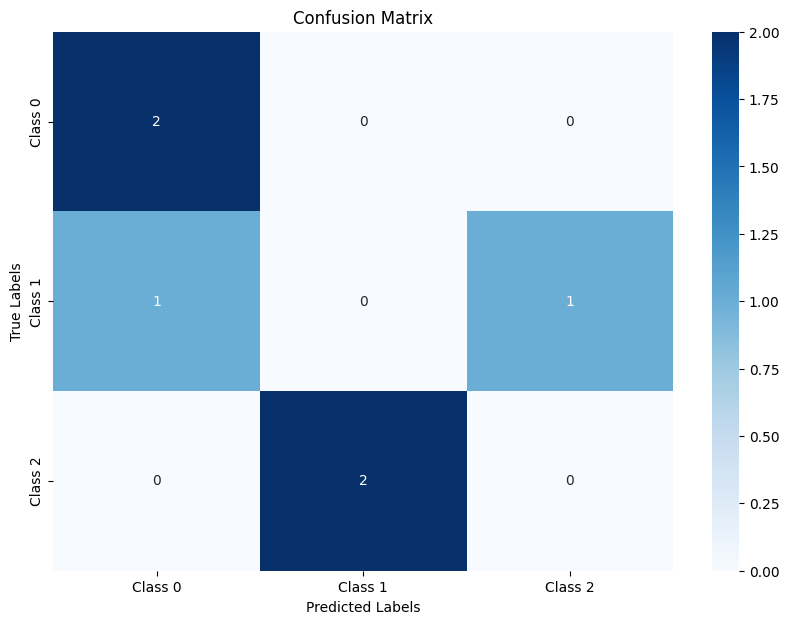

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import math


def calculate_average(numbers):
    if not numbers:
        return None
    return sum(numbers) / len(numbers)


def calculate_standard_deviation(numbers):
    if not numbers:
        return None
    avg = calculate_average(numbers)
    variance = sum((x - avg) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)



def f1_macro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='macro')

def f1_micro(true_labels, predicted_labels):
    return f1_score(true_labels, predicted_labels, average='micro')

def accuracy_metric(true_labels, predicted_labels):
    return accuracy_score(true_labels, predicted_labels)

def precision(true_labels, predicted_labels):
    return precision_score(true_labels, predicted_labels, average='macro')

def recall(true_labels, predicted_labels):
    return recall_score(true_labels, predicted_labels, average='macro')

def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

if __name__ == "__main__":
    true_labels = [0, 1, 2, 0, 1, 2]
    predicted_labels = [0, 2, 1, 0, 0, 1]
    class_names = ['Class 0', 'Class 1', 'Class 2']

    print("F1 Macro:", f1_macro(true_labels, predicted_labels))
    print("F1 Micro:", f1_micro(true_labels, predicted_labels))
    print("Accuracy:", accuracy_metric(true_labels, predicted_labels))
    print("Precision:", precision(true_labels, predicted_labels))
    print("Recall:", recall(true_labels, predicted_labels))

    plot_confusion_matrix(true_labels, predicted_labels, class_names)

# **English Doc Classification**

**import libraries**

In [ ]:
!pip install open_clip_torch

In [19]:
model_type = "xlm-roberta-large-ViT-H-14"
pretrained_from = "frozen_laion5b_s13b_b90k"

In [20]:
import torch
import open_clip
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

**device**

In [22]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
device

**model**

In [ ]:
clip_model, _, clip_preprocess = open_clip.create_model_and_transforms(model_type, pretrained=pretrained_from)
clip_model.eval()
tokenizer = open_clip.get_tokenizer(model_type)

**dataloader**

In [25]:
unique_values = english_df['Broad_Genre'].unique()
print(unique_values)

['Drama & Emotion' 'Action & Adventure' 'Culture & Society'
 'Comedy & Light-Hearted' 'Arts & Nature']


In [26]:
variable2label = dict()

for i, var in enumerate(unique_values):
    variable2label[var] = i

variable2label

{'Drama & Emotion': 0,
 'Action & Adventure': 1,
 'Culture & Society': 2,
 'Comedy & Light-Hearted': 3,
 'Arts & Nature': 4}

In [27]:
all_pairs_train = list()

for _, row in english_train_df_80.iterrows():
    all_pairs_train.append((row['Description'], variable2label[row['Broad_Genre']]))

In [28]:
all_pairs_valid = list()

for _, row in english_val_df_10.iterrows():
    all_pairs_valid.append((row['Description'], variable2label[row['Broad_Genre']]))

In [29]:
all_pairs_test = list()

for _, row in english_test_df_10.iterrows():
    all_pairs_test.append((row['Description'], variable2label[row['Broad_Genre']]))

In [30]:
len(all_pairs_train), len(all_pairs_valid), len(all_pairs_test)

(745, 93, 94)

In [31]:
class CustomDataset(Dataset):
    def __init__(self, sentence_pairs, tokenizer):
        self.sentence_pairs = sentence_pairs
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.sentence_pairs)

    def __getitem__(self, idx):
        current_pair = self.sentence_pairs[idx]
        tokenized_sentence = self.tokenizer([remove_stopwords(current_pair[0])])
        return tokenized_sentence.squeeze(), current_pair[1]

In [32]:
train_ds = CustomDataset(all_pairs_train, tokenizer)
val_ds = CustomDataset(all_pairs_valid, tokenizer)
test_ds = CustomDataset(all_pairs_test, tokenizer)

In [33]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size*2)
test_dl = DataLoader(test_ds, batch_size*2)

**custom model**

In [34]:
all_unique_labels = len(unique_values)
all_unique_labels

5

In [35]:
@torch.no_grad()
def evaluate(model, val_loader):
    global clip_model
    model.eval()
    outputs = list()
    for batch in val_loader:
        clip_model.eval()
        with torch.no_grad(), torch.cuda.amp.autocast():
            text_features = clip_model.encode_text(batch[0])
            text_features /= text_features.norm(dim=-1, keepdim=True)
        out = model.validation_step((text_features.type(torch.float), batch[1]))
        outputs.append(out)
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    global clip_model
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            clip_model.eval()
            with torch.no_grad(), torch.cuda.amp.autocast():
                text_features = clip_model.encode_text(batch[0])
                text_features /= text_features.norm(dim=-1, keepdim=True)
            loss = model.training_step((text_features.type(torch.float), batch[1]))
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [36]:
class ClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [37]:
class MovieClassifier(ClassificationBase):
    def __init__(self, number_of_classes):
        super().__init__()
        global embed_size
        self.network = nn.Sequential(
            nn.Linear(1024, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Dropout(0.25),
            nn.ReLU(),
            nn.Linear(256, number_of_classes)
        )

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = MovieClassifier(all_unique_labels)
model

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

In [ ]:
to_device(clip_model, device)

**train**

In [41]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [42]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

100%|██████████| 24/24 [00:04<00:00,  5.84it/s]


Epoch [0], train_loss: 1.2055, val_loss: 1.1240, val_acc: 0.5805


100%|██████████| 24/24 [00:02<00:00, 10.09it/s]


Epoch [1], train_loss: 1.0118, val_loss: 1.1061, val_acc: 0.5805


100%|██████████| 24/24 [00:02<00:00, 10.05it/s]


Epoch [2], train_loss: 0.9721, val_loss: 1.0478, val_acc: 0.5805


100%|██████████| 24/24 [00:02<00:00,  9.98it/s]


Epoch [3], train_loss: 0.9320, val_loss: 1.0081, val_acc: 0.5962


100%|██████████| 24/24 [00:02<00:00, 10.01it/s]


Epoch [4], train_loss: 0.8756, val_loss: 0.9693, val_acc: 0.5523


100%|██████████| 24/24 [00:02<00:00,  9.95it/s]


Epoch [5], train_loss: 0.8084, val_loss: 0.9597, val_acc: 0.6463


100%|██████████| 24/24 [00:02<00:00,  9.92it/s]


Epoch [6], train_loss: 0.7463, val_loss: 0.9373, val_acc: 0.6730


100%|██████████| 24/24 [00:02<00:00,  9.88it/s]


Epoch [7], train_loss: 0.7296, val_loss: 0.9740, val_acc: 0.6463


100%|██████████| 24/24 [00:02<00:00,  9.85it/s]


Epoch [8], train_loss: 0.6791, val_loss: 0.9732, val_acc: 0.6056


100%|██████████| 24/24 [00:02<00:00,  9.83it/s]


Epoch [9], train_loss: 0.6160, val_loss: 1.0748, val_acc: 0.6730


**plot**

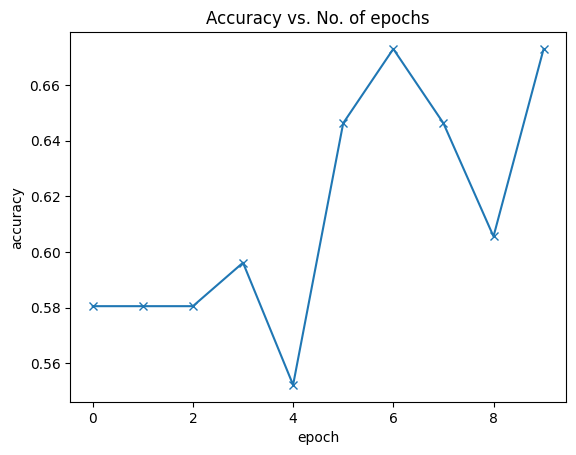

In [43]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

plot_accuracies(history)

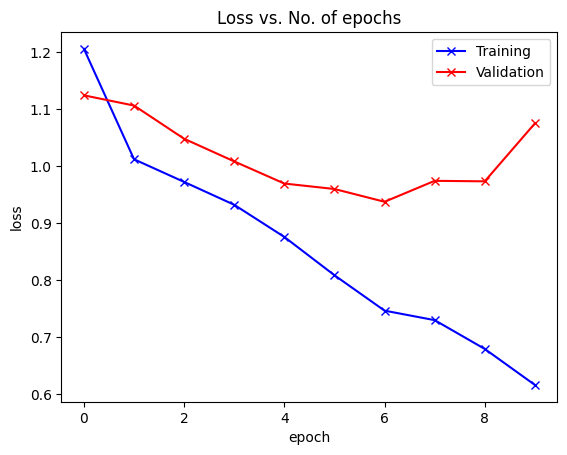

In [44]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

plot_losses(history)

**test**

In [45]:
@torch.no_grad()
def evaluate(model, val_loader):
    actual = list()
    predicted = list()
    global clip_model
    model.eval()
    for batch in val_loader:
        clip_model.eval()
        with torch.no_grad(), torch.cuda.amp.autocast():
            text_features = clip_model.encode_text(batch[0])
            text_features /= text_features.norm(dim=-1, keepdim=True)
        out = model(text_features.type(torch.float))
        _, preds = torch.max(out, dim=1)
        actual += batch[1].detach().cpu().tolist()
        predicted += preds.detach().cpu().tolist()
    return actual, predicted

In [46]:
test_dl = DeviceDataLoader(test_dl, device)
actual, predicted = evaluate(model, test_dl)

In [47]:
class_names = list()

for i in range(len(variable2label)):
    for key, value in variable2label.items():
        if i == value:
            class_names.append(key)
            break

F1 Macro: 0.33617886178861783
F1 Micro: 0.6595744680851063
Accuracy: 0.6595744680851063
Precision: 0.3681086519114688
Recall: 0.33606334841628954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


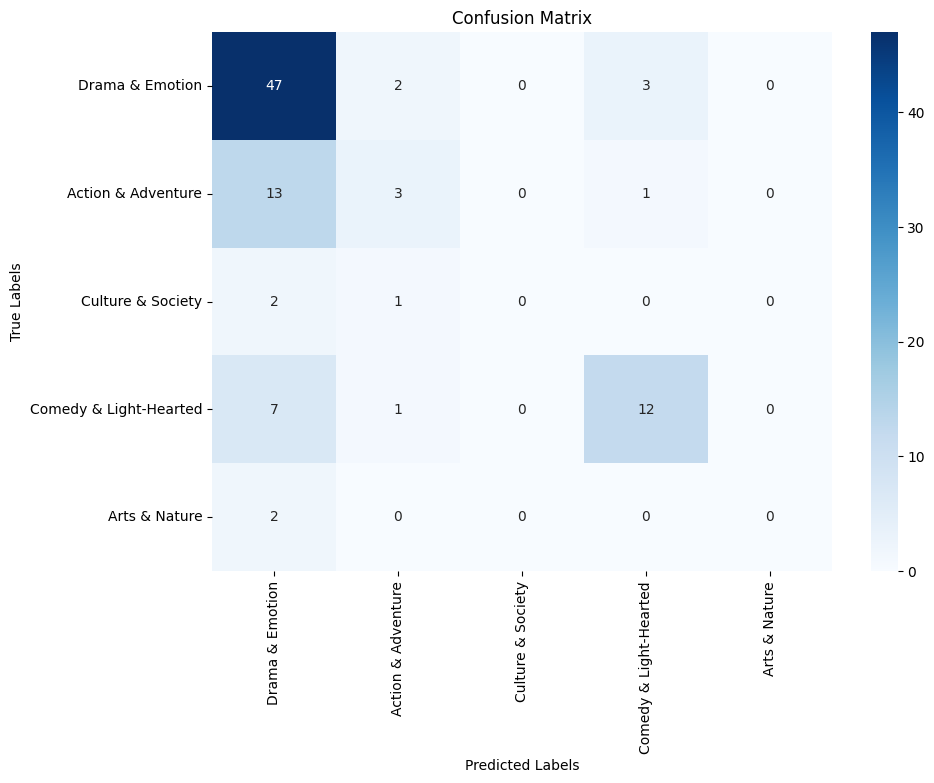

In [48]:
true_labels = actual
predicted_labels = predicted

print("F1 Macro:", f1_macro(true_labels, predicted_labels))
print("F1 Micro:", f1_micro(true_labels, predicted_labels))
print("Accuracy:", accuracy_metric(true_labels, predicted_labels))
print("Precision:", precision(true_labels, predicted_labels))
print("Recall:", recall(true_labels, predicted_labels))

plot_confusion_matrix(true_labels, predicted_labels, class_names)

OOD check

In [49]:
drama_movies = [
    "A young girl battles terminal illness while her family struggles to come to terms with their impending loss.",
    "An aging boxer seeks redemption as he trains a young protégé, facing his own past failures along the way.",
    "A musician grapples with deafness, discovering the resilience to pursue his passion despite overwhelming odds.",
    "A single mother sacrifices everything to ensure her daughter’s future, navigating love, loss, and perseverance.",
    "A disillusioned writer returns to his hometown, confronting old wounds and rekindling lost relationships.",
    "A teacher in an inner-city school fights to inspire hope in her students amidst violence and poverty.",
    "A talented chef faces a personal and professional crisis, finding solace in a rekindled family bond.",
    "A teenager with a troubled past finds solace and direction through the mentorship of an unlikely friend.",
    "A high-powered lawyer rethinks his life choices when he reconnects with an old flame in his rural hometown.",
    "A man battles with guilt and forgiveness after a tragic accident alters his family forever.",
    "A father and daughter navigate the challenges of life on the margins of society, relying on each other for survival.",
    "A young athlete overcomes societal and familial expectations to follow his true passion.",
    "A soldier returns home with PTSD, struggling to reintegrate into civilian life and reconnect with loved ones.",
    "A woman re-evaluates her life after an unexpected diagnosis, finding new purpose and meaning.",
    "A family confronts their patriarch’s hidden past when a long-lost relative appears out of the blue.",
    "A young couple deals with the fallout of an unexpected pregnancy while balancing their dreams and responsibilities.",
    "A once-famous actor battles alcoholism and attempts a comeback, reflecting on his tumultuous career.",
    "A man searches for his biological parents, uncovering secrets that change his understanding of family.",
    "A gifted pianist faces the pressures of competition and the demands of a perfectionist father.",
    "A woman rebuilds her life after escaping an abusive relationship, finding strength in unexpected places.",
    "A passionate activist fights for social justice, facing personal and political challenges along the way.",
    "A novelist deals with writer’s block and the pressures of fame while coping with personal demons.",
    "A doctor wrestles with the ethics of her profession after a controversial decision affects a patient’s life.",
    "A troubled teen finds redemption and purpose through a community service program.",
    "A family’s secrets unravel during a tense Thanksgiving reunion, forcing them to confront their past.",
    "A promising football player struggles with the impact of a career-ending injury and finding a new path.",
    "A woman rediscovers her identity after the death of her husband, embarking on a journey of self-discovery.",
    "A struggling artist finds unexpected inspiration in an unlikely muse, changing both their lives.",
    "A man reconnects with his estranged brother after their father’s death, uncovering old resentments and new understandings.",
    "A college student balances academic pressures and familial expectations while pursuing her own dreams.",
    "A couple faces the trials of infertility, exploring the depths of their relationship and hope.",
    "A journalist uncovers corruption in her hometown, risking her career and personal safety.",
    "A former child prodigy returns home to care for her ailing mother, rediscovering her passion and purpose.",
    "A prisoner on death row finds redemption through an unexpected friendship with a prison guard.",
    "A devoted teacher helps a struggling student unlock his potential, changing both their lives forever."
]
comedy_movies = [
    "A bumbling detective hilariously stumbles his way through a major case, accidentally solving it despite his constant mishaps.",
    "Two clueless friends start a dog-walking business, leading to a series of comedic disasters and unexpected adventures.",
    "A quirky family must navigate the hilarity of living together again when their eccentric grandmother moves in.",
    "A hopeless romantic's awkward attempts at dating lead to laugh-out-loud moments and unexpected romance.",
    "A group of college misfits hatch a series of outlandish schemes to save their beloved campus hangout from closure.",
    "A down-on-his-luck magician’s ridiculous tricks accidentally turn him into a viral sensation overnight.",
    "An over-the-top wedding planner faces a comical series of disasters while trying to pull off the perfect wedding.",
    "A man’s attempts to impress his in-laws with his cooking skills result in a kitchen catastrophe and side-splitting chaos.",
    "A group of mismatched co-workers must band together to win a hilarious office competition and save their jobs.",
    "A novice ghost hunter’s bungling efforts lead to uproarious encounters with not-so-spooky spirits."
]
war_action_movies = [
    "A fearless commando leads a daring raid behind enemy lines, unleashing a whirlwind of explosive action and intense combat.",
    "A skilled fighter pilot battles enemy forces in high-octane dogfights, navigating a sky filled with bullets and missiles.",
    "A group of elite soldiers embarks on a covert mission to rescue hostages, facing relentless gunfire and deadly ambushes.",
    "A seasoned warrior returns to the battlefield, orchestrating a strategic assault that culminates in an epic showdown.",
    "A squad of determined marines fights their way through a war-torn city, engaging in brutal hand-to-hand combat and tactical warfare."
]

final_ood_movies = drama_movies + comedy_movies + war_action_movies
final_ood_labels = [0] * 35 + [3] * 10 + [1] * 5

In [51]:
ood_list = list()

for i in range(len(final_ood_movies)):
    ood_list.append((final_ood_movies[i], final_ood_labels[i]))

In [52]:
ood_ds = CustomDataset(ood_list, tokenizer)
ood_dl = DataLoader(ood_ds, batch_size*2)

In [55]:
ood_dl = DeviceDataLoader(ood_dl, device)
actual, predicted = evaluate(model, ood_dl)

F1 Macro: 0.8215809794757165
F1 Micro: 0.92
Accuracy: 0.92
Precision: 0.9658119658119658
Recall: 0.7666666666666666


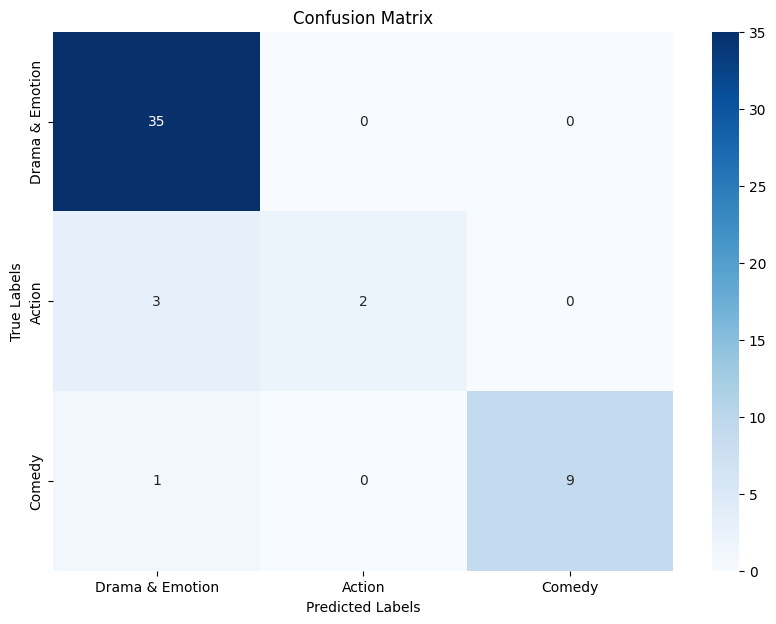

In [57]:
true_labels = actual
predicted_labels = predicted
class_names = ["Drama & Emotion", "Action", "Comedy"]

print("F1 Macro:", f1_macro(true_labels, predicted_labels))
print("F1 Micro:", f1_micro(true_labels, predicted_labels))
print("Accuracy:", accuracy_metric(true_labels, predicted_labels))
print("Precision:", precision(true_labels, predicted_labels))
print("Recall:", recall(true_labels, predicted_labels))

plot_confusion_matrix(true_labels, predicted_labels, class_names)

# **Persian Doc Classification**

**import libraries**

In [ ]:
import torch
from transformers import AutoConfig, AutoTokenizer, AutoModel, TFAutoModel
from transformers import BertTokenizer, BertModel
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

**device**

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [ ]:
device = get_default_device()
device

**model**

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
bert_model = BertModel.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
to_device(bert_model, device)

**dataloader**

In [ ]:
unique_values = persian_df['Broad_Genre'].unique()
print(unique_values)

['Drama & Emotion' 'Action & Adventure' 'Culture & Society'
 'Comedy & Light-Hearted' 'Arts & Nature']


In [ ]:
variable2label = dict()

for i, var in enumerate(unique_values):
    variable2label[var] = i

variable2label

{'Drama & Emotion': 0,
 'Action & Adventure': 1,
 'Culture & Society': 2,
 'Comedy & Light-Hearted': 3,
 'Arts & Nature': 4}

In [ ]:
all_pairs_train = list()

for _, row in persian_train_df_80.iterrows():
    all_pairs_train.append((row['Description'], variable2label[row['Broad_Genre']]))

In [ ]:
all_pairs_valid = list()

for _, row in persian_val_df_10.iterrows():
    all_pairs_valid.append((row['Description'], variable2label[row['Broad_Genre']]))

In [ ]:
all_pairs_test = list()

for _, row in persian_test_df_10.iterrows():
    all_pairs_test.append((row['Description'], variable2label[row['Broad_Genre']]))

In [ ]:
len(all_pairs_train), len(all_pairs_valid), len(all_pairs_test)

(745, 93, 94)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, sentence_pairs):
        self.sentence_pairs = sentence_pairs

    def __len__(self):
        return len(self.sentence_pairs)

    def __getitem__(self, idx):
        current_pair = self.sentence_pairs[idx]

        inputs = bert_tokenizer(remove_stopwords_persian(current_pair[0]), return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)
        outputs = bert_model(**inputs)
        output = outputs.last_hidden_state.mean(dim=1).squeeze()

        return output, current_pair[1]

In [ ]:
train_ds = CustomDataset(all_pairs_train)
val_ds = CustomDataset(all_pairs_valid)
test_ds = CustomDataset(all_pairs_test)

In [ ]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size*2)
test_dl = DataLoader(test_ds, batch_size*2)

**custom model**

In [ ]:
all_unique_labels = len(unique_values)
all_unique_labels

5

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = list()
    for batch in val_loader:
        out = model.validation_step(batch)
        outputs.append(out)
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
class ClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class MovieClassifier(ClassificationBase):
    def __init__(self, number_of_classes):
        super().__init__()
        global embed_size
        self.network = nn.Sequential(
            nn.Linear(768, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Dropout(0.25),
            nn.ReLU(),
            nn.Linear(256, number_of_classes)
        )

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = MovieClassifier(all_unique_labels)
model

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

**train**

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

100%|██████████| 24/24 [00:25<00:00,  1.04s/it]


Epoch [0], train_loss: 1.1291, val_loss: 1.1250, val_acc: 0.5805


100%|██████████| 24/24 [00:25<00:00,  1.04s/it]


Epoch [1], train_loss: 0.9837, val_loss: 1.0754, val_acc: 0.5789


100%|██████████| 24/24 [00:25<00:00,  1.05s/it]


Epoch [2], train_loss: 0.9289, val_loss: 1.0571, val_acc: 0.5867


100%|██████████| 24/24 [00:24<00:00,  1.04s/it]


Epoch [3], train_loss: 0.8535, val_loss: 1.0719, val_acc: 0.5539


100%|██████████| 24/24 [00:25<00:00,  1.04s/it]


Epoch [4], train_loss: 0.8347, val_loss: 1.0761, val_acc: 0.5242


100%|██████████| 24/24 [00:24<00:00,  1.04s/it]


Epoch [5], train_loss: 0.8154, val_loss: 1.1562, val_acc: 0.5633


100%|██████████| 24/24 [00:24<00:00,  1.03s/it]


Epoch [6], train_loss: 0.7734, val_loss: 1.1340, val_acc: 0.5867


100%|██████████| 24/24 [00:24<00:00,  1.04s/it]


Epoch [7], train_loss: 0.7451, val_loss: 1.1804, val_acc: 0.5867


100%|██████████| 24/24 [00:24<00:00,  1.04s/it]


Epoch [8], train_loss: 0.7163, val_loss: 1.1500, val_acc: 0.5946


100%|██████████| 24/24 [00:25<00:00,  1.04s/it]


Epoch [9], train_loss: 0.6804, val_loss: 1.2532, val_acc: 0.5962


**plot**

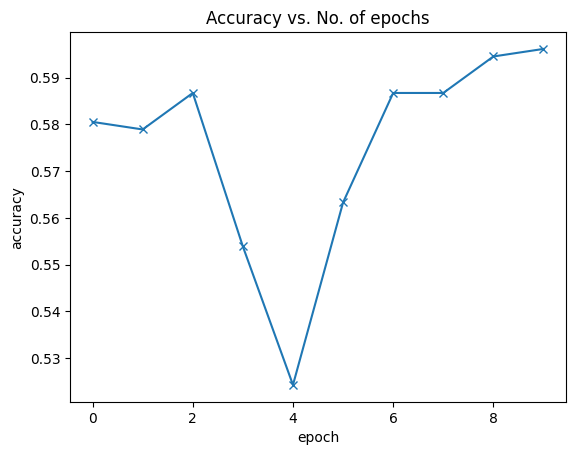

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

plot_accuracies(history)

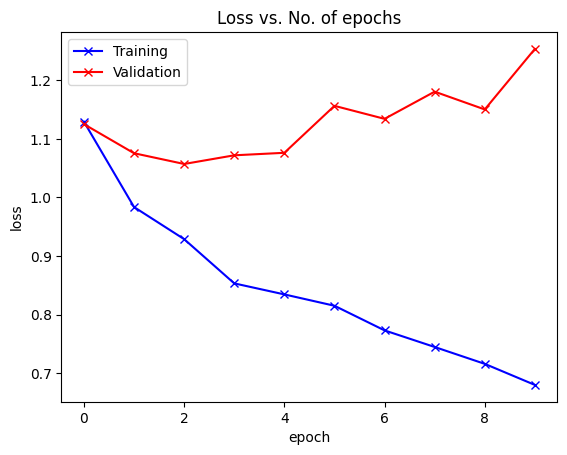

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

plot_losses(history)

**test**

In [ ]:
def evaluate(model, val_loader):
    actual = list()
    predicted = list()
    model.eval()
    for batch in val_loader:
        out = model(batch[0])
        _, preds = torch.max(out, dim=1)
        actual += batch[1].detach().cpu().tolist()
        predicted += preds.detach().cpu().tolist()
    return actual, predicted

In [ ]:
test_dl = DeviceDataLoader(test_dl, device)
actual, predicted = evaluate(model, test_dl)

In [ ]:
class_names = list()

for i in range(len(variable2label)):
    for key, value in variable2label.items():
        if i == value:
            class_names.append(key)
            break

F1 Macro: 0.2508577772182611
F1 Micro: 0.574468085106383
Accuracy: 0.574468085106383
Precision: 0.3078762306610408
Recall: 0.2560633484162896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


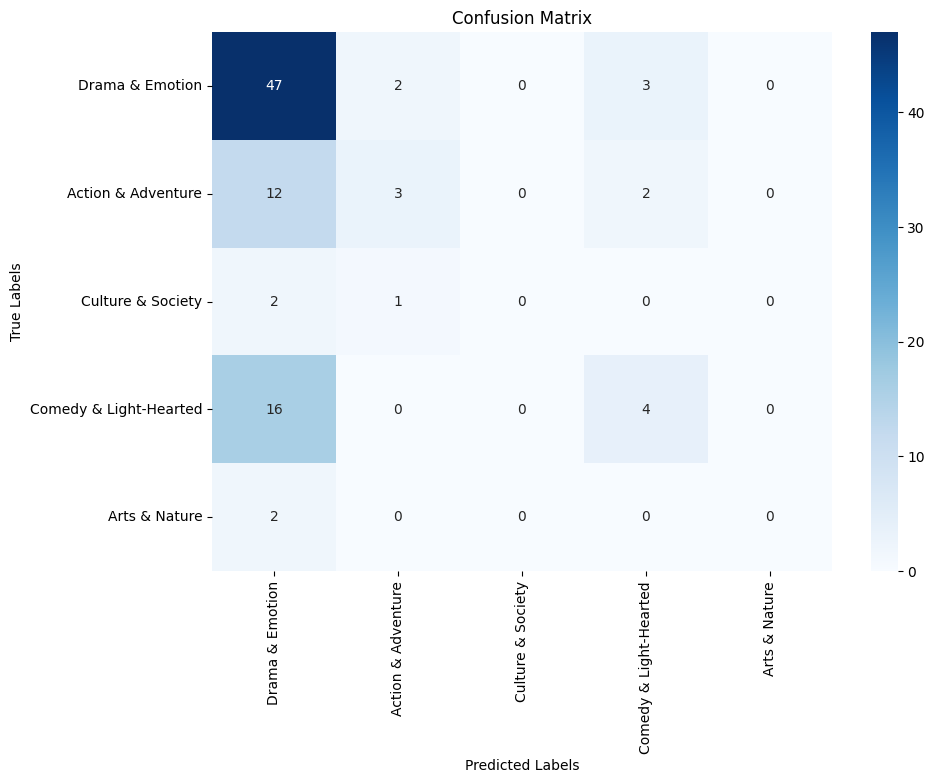

In [ ]:
true_labels = actual
predicted_labels = predicted

print("F1 Macro:", f1_macro(true_labels, predicted_labels))
print("F1 Micro:", f1_micro(true_labels, predicted_labels))
print("Accuracy:", accuracy_metric(true_labels, predicted_labels))
print("Precision:", precision(true_labels, predicted_labels))
print("Recall:", recall(true_labels, predicted_labels))

plot_confusion_matrix(true_labels, predicted_labels, class_names)